# Python code to train a Churn Model


* Creation date: August 2024
* Author: Martin Hernandez

In [3]:
# Importing general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Importing data 
* A spreadsheet Data.xlsx is provided as data source. There are two sheets within Data.xlsx file: Other data and Churn within 
* The mentioned sheets will be imported as dataframes and then merged using customerID field to get a final dataframe
* Data dictionary
customerID: Customer ID
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No
* Dependents: Whether the customer has dependents or not (Yes, No)
* Tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer
(automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)

In [6]:
# Importing data

df_features = pd.read_excel('Data.xlsx',sheet_name='Other data')
df_target = pd.read_excel('Data.xlsx',sheet_name='Churn')

# Merging df'set

df=pd.merge(df_target,df_features, on='customerID')

In [8]:
# Inspecting the resulting dataframe

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Yes,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Yes,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Yes,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Yes,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


##### Profiling data 
* In this section EDA is executed and general data quality validations
* Several charts are displayed

##### Insights about the data
* df contains 7043 entries and 19 columns
* Null values are not detected
* SeniorCitizen variable looks to be binary and not numerical
* Tenure variable does not present outlier problems 
* Churn target variable must be transformed to be 0 or 1

In [11]:
# General dataframe information 
# df contains 7043 entries and 19 columns
# Null values are not detected

print("----- Basic Information -----")
display(df.info())

----- Basic Information -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   Churn             7043 non-null   object
 2   gender            7043 non-null   object
 3   SeniorCitizen     7043 non-null   int64 
 4   Partner           7043 non-null   object
 5   Dependents        7043 non-null   object
 6   tenure            7043 non-null   int64 
 7   PhoneService      7043 non-null   object
 8   MultipleLines     7043 non-null   object
 9   InternetService   7043 non-null   object
 10  OnlineSecurity    7043 non-null   object
 11  OnlineBackup      7043 non-null   object
 12  DeviceProtection  7043 non-null   object
 13  TechSupport       7043 non-null   object
 14  StreamingTV       7043 non-null   object
 15  StreamingMovies   7043 non-null   object
 16  Contract          7043 non-nul

None

In [21]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype(str)

In [32]:
# Additional libraries
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Churn' column
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [14]:
# Statisc summary for Senior Citizen and Tenure features
# SeniorCitizen variable looks to be binary and not numerical
# Tenure variable does not present outlier problems 
print("\n----- Statistical Summary -----")
display(df.describe())


----- Statistical Summary -----


,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


#### Unviarated and bivariated analysis

##### Insights

* Target variable looks balanced 
* All variables do not present missing values or outliers
* There is not any sub-category that could be negligible for next steps in the analysis
* Gender probably will not contribute to separate churn from non-churn indiviuals due to very similar prevalence percentage values 
* The rest of the variables could be included in the training stage

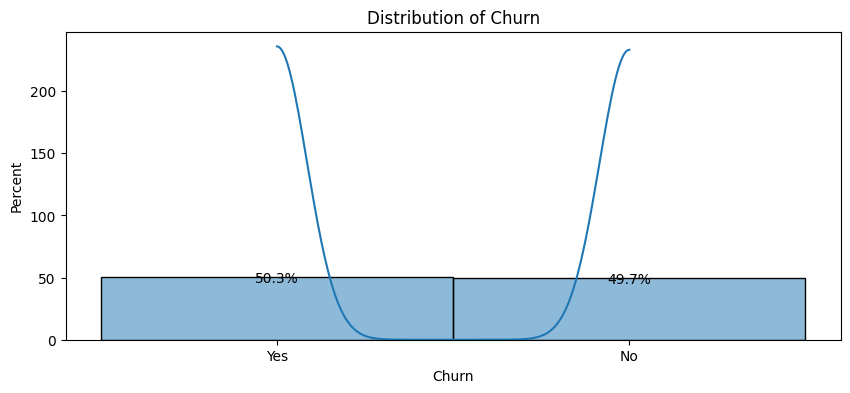

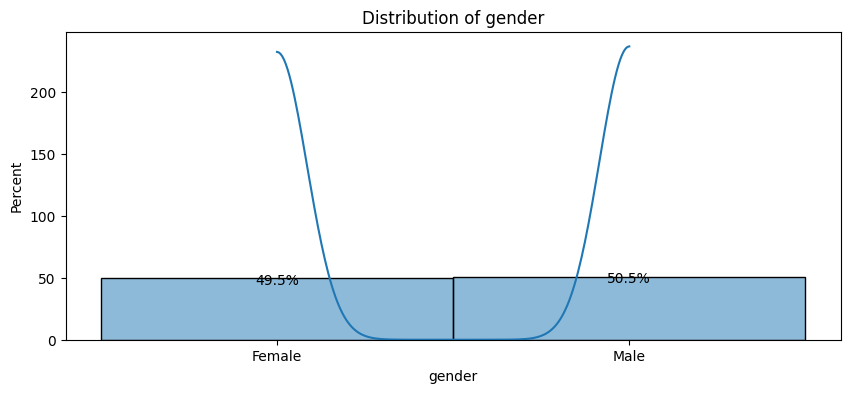

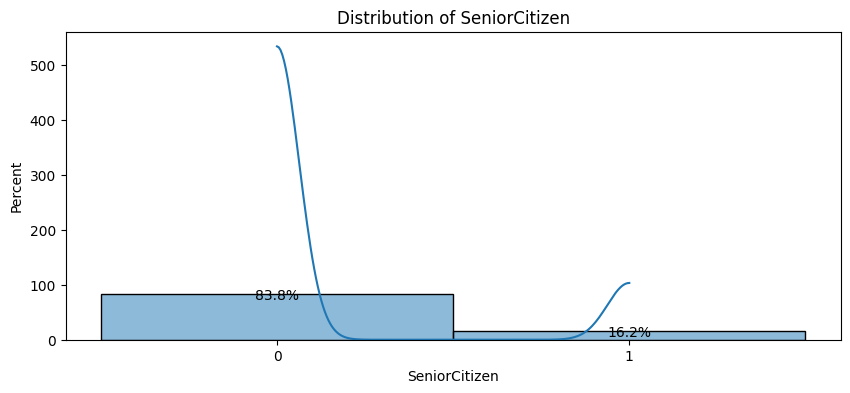

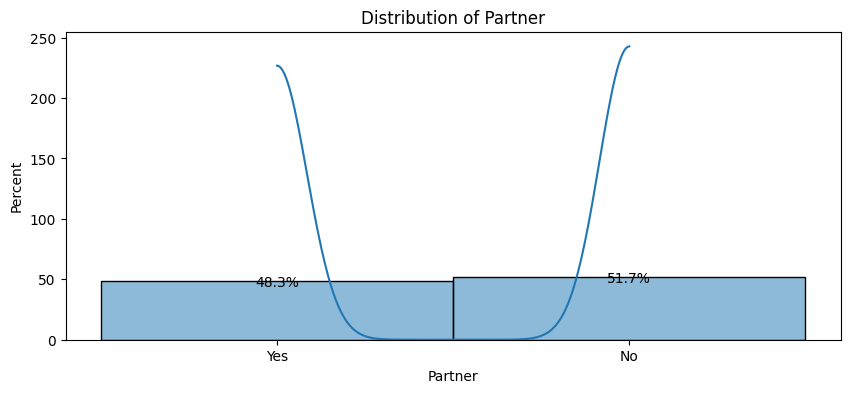

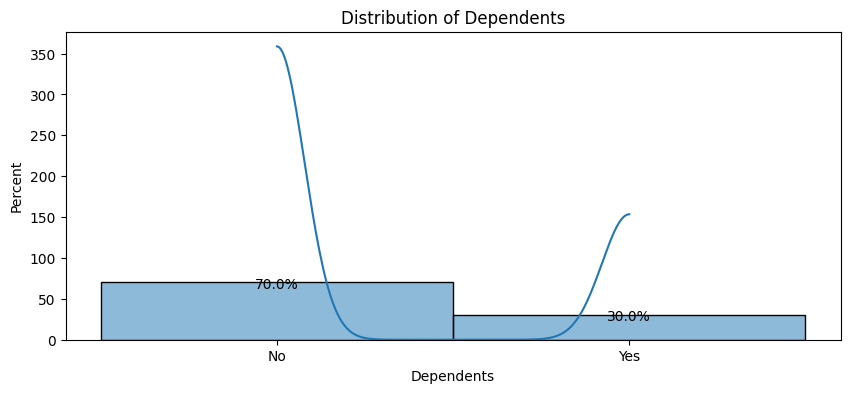

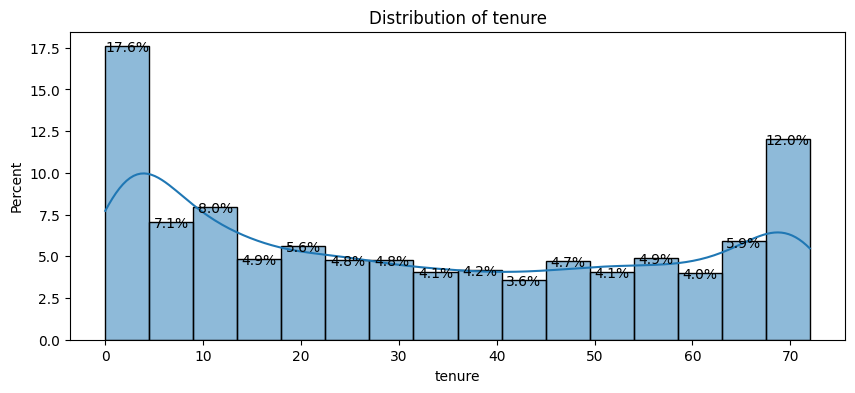

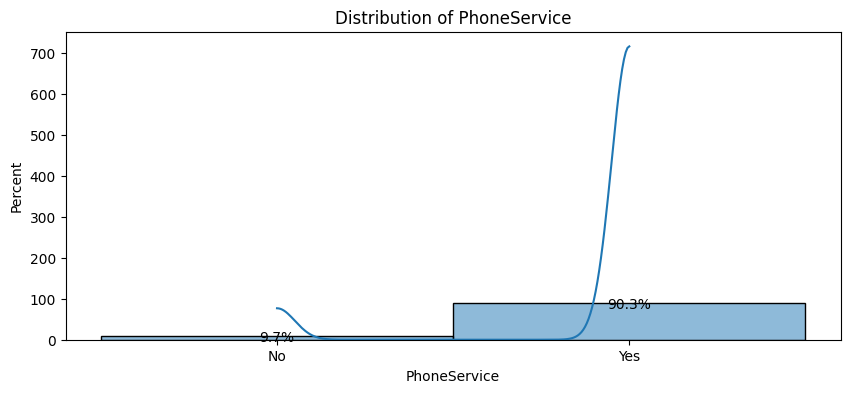

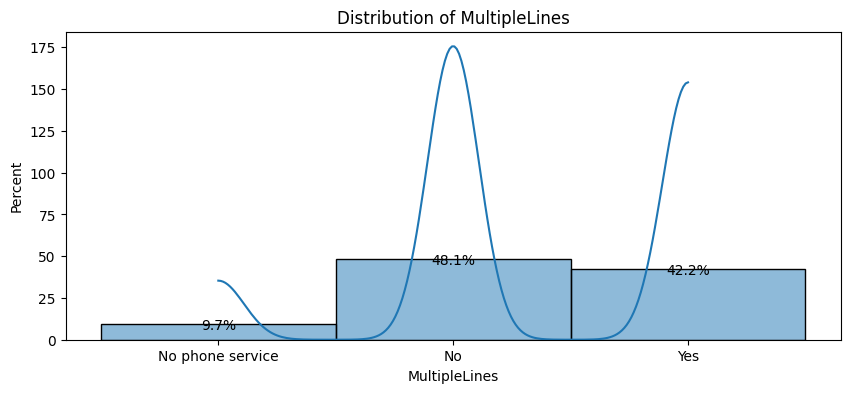

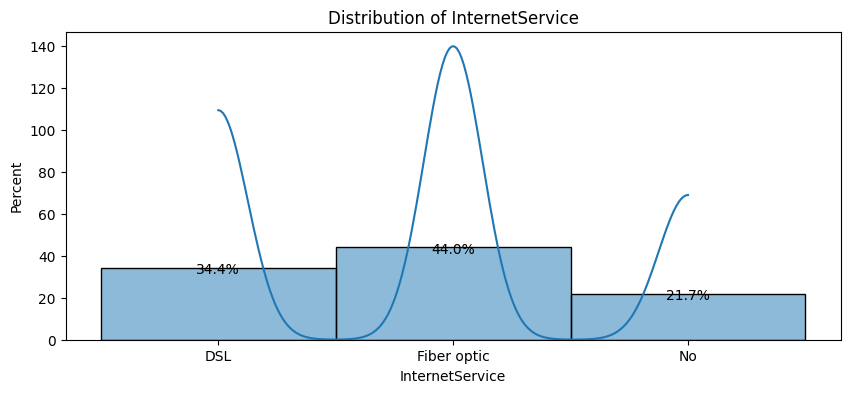

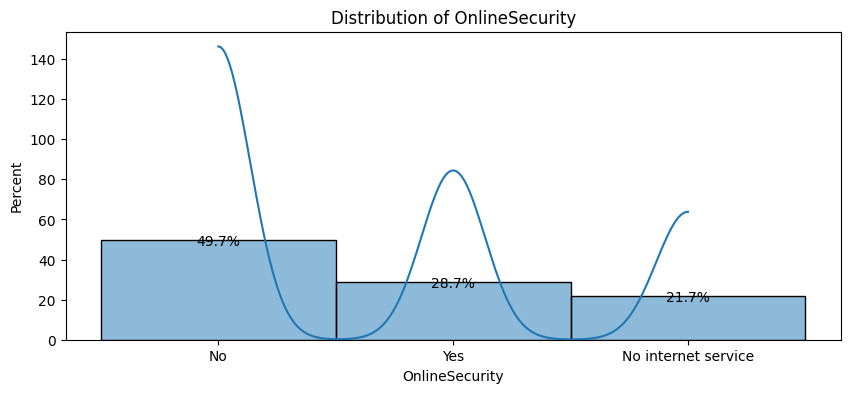

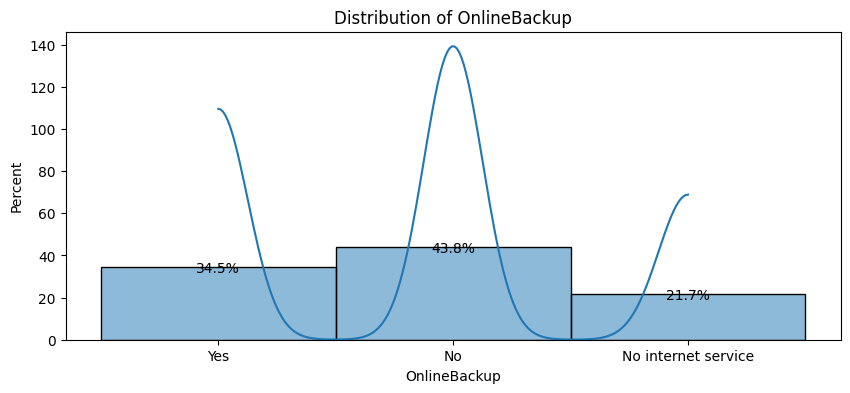

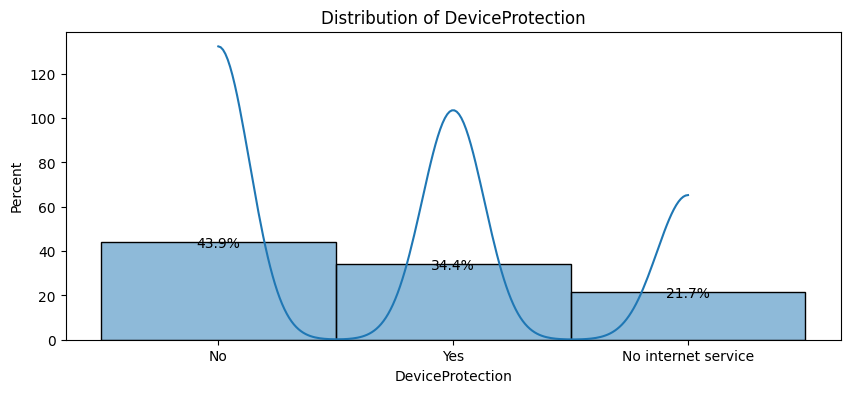

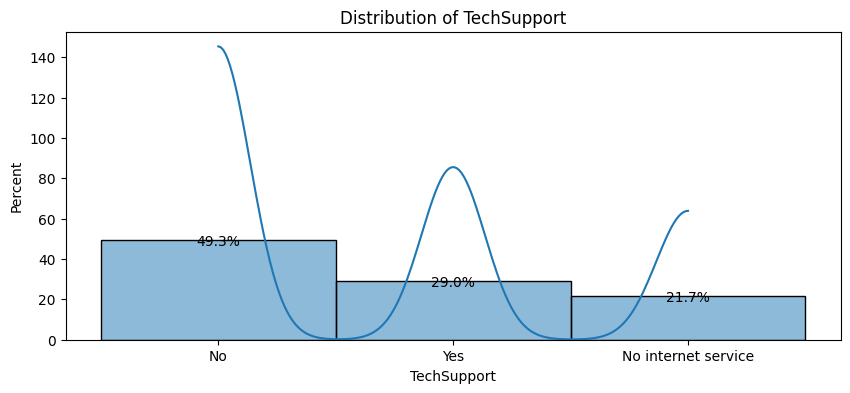

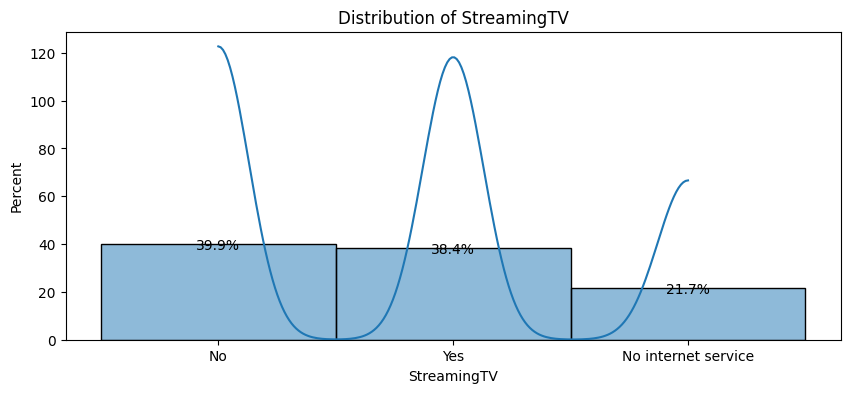

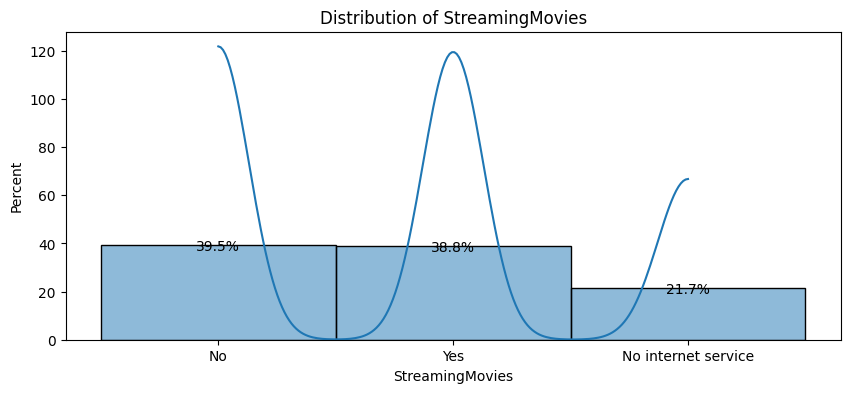

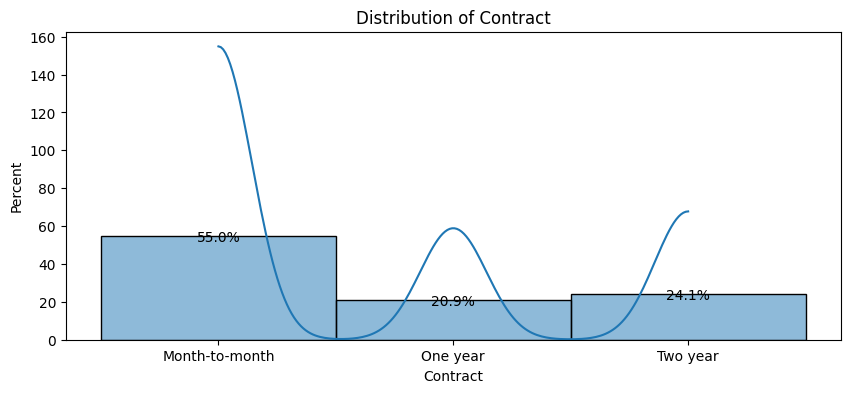

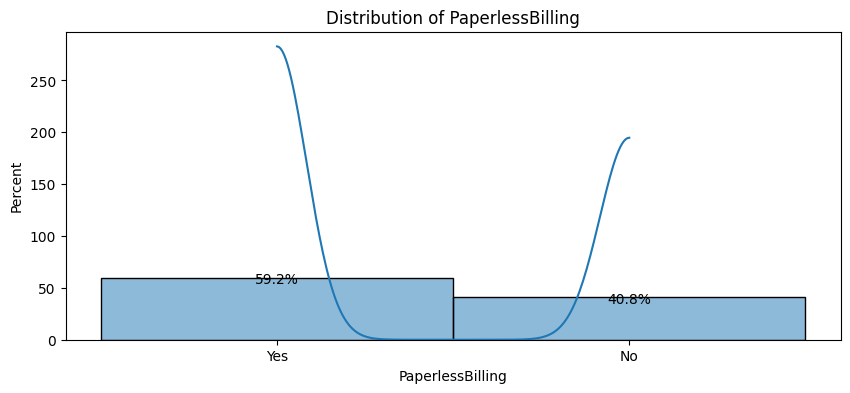

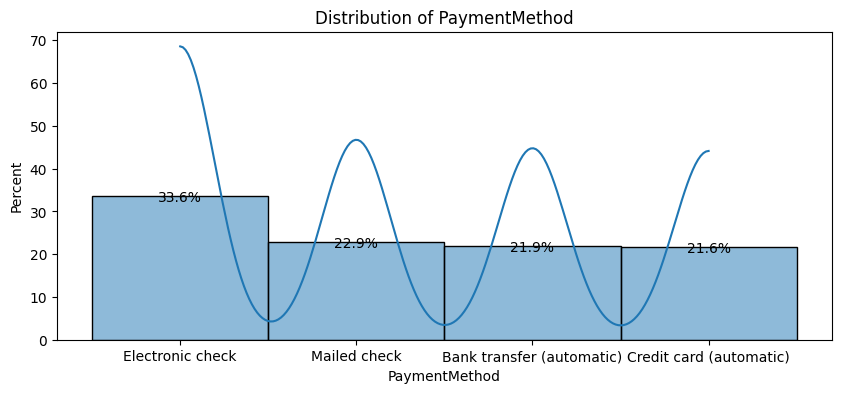

In [23]:
# Univariated Analysis
# Creating df_univ dataframe to exclude the customerID column

df_univ=df.loc[:, ~df.columns.isin(['customerID'])]

# Univariate Analysis - Distribution of features

import matplotlib.pyplot as plt
import seaborn as sns

for column in df_univ.columns:
    plt.figure(figsize=(10, 4))
    
    # Plot histogram with percentage distribution
    ax = sns.histplot(df_univ[column], kde=True, stat="percent")
    
    # Calculate and annotate percentages
    total = len(df_univ[column])
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        percent = f'{height:.1f}%'
        ax.annotate(percent, (x + width/2, height), ha='center', va='center_baseline')
    
    # Add title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

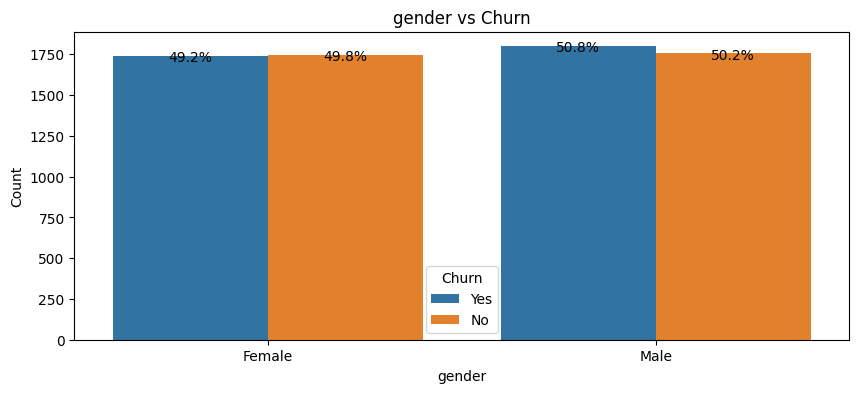

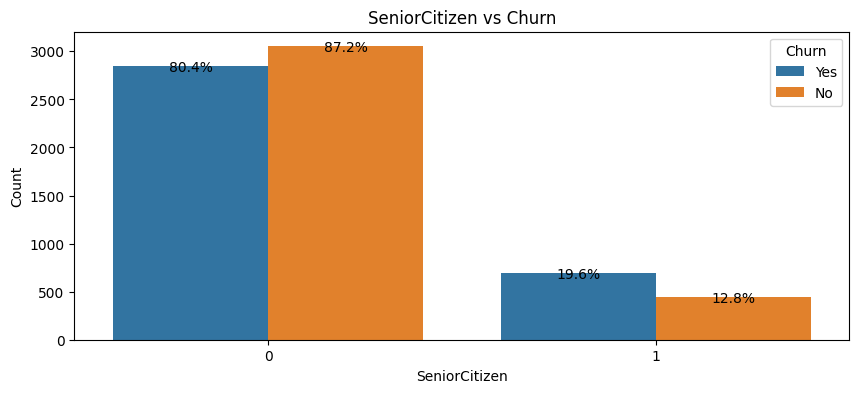

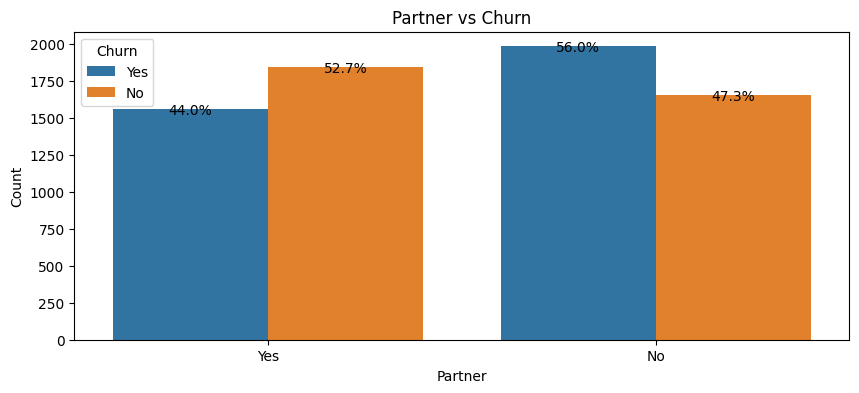

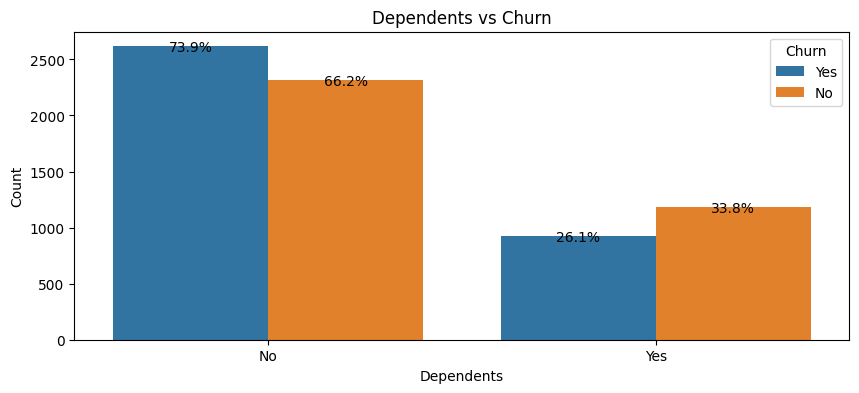

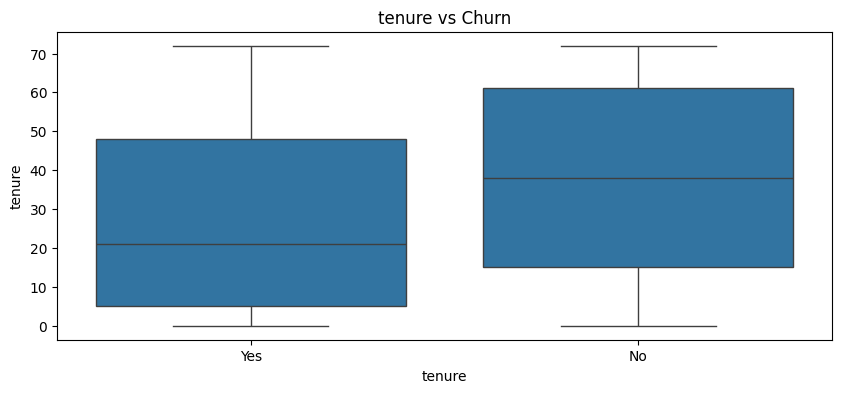

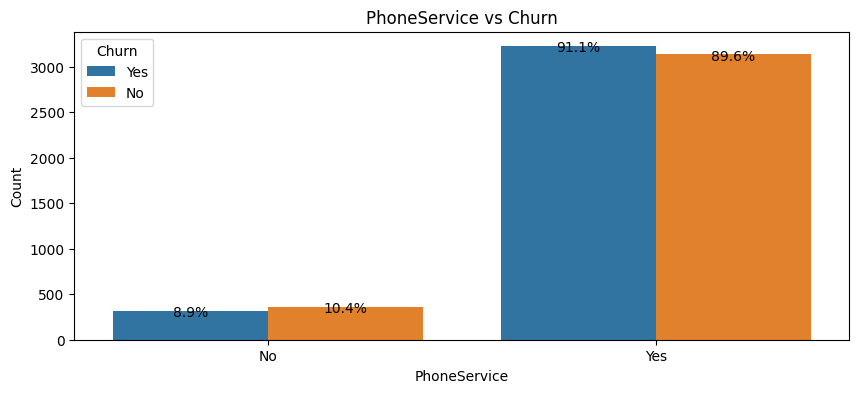

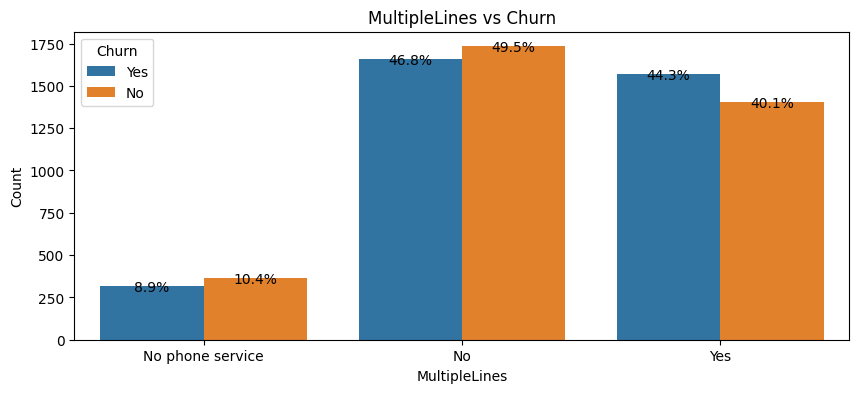

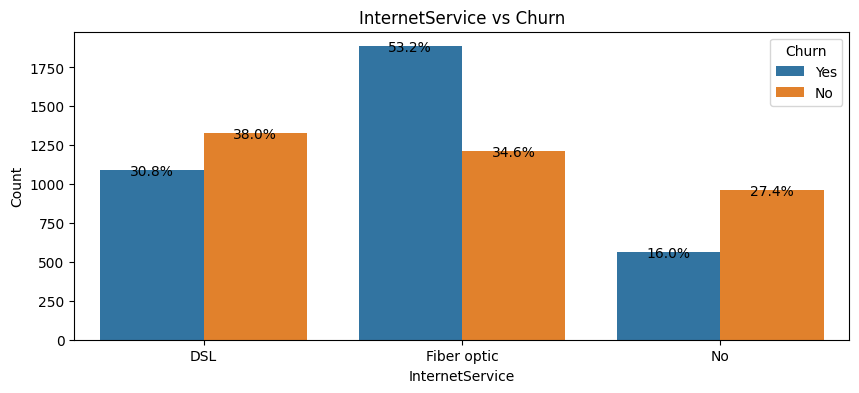

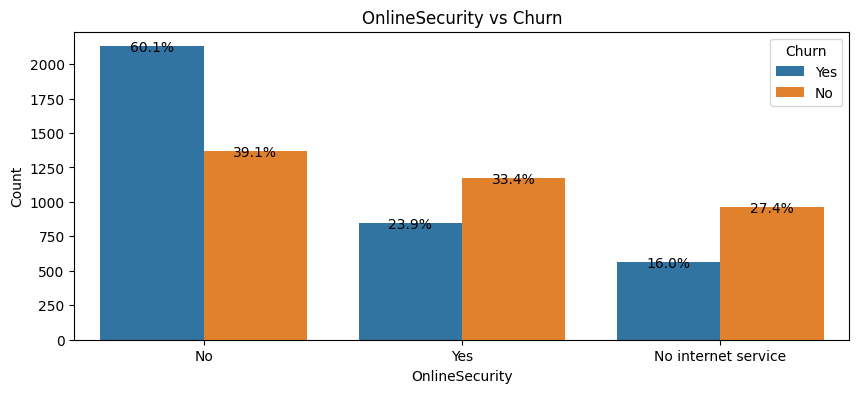

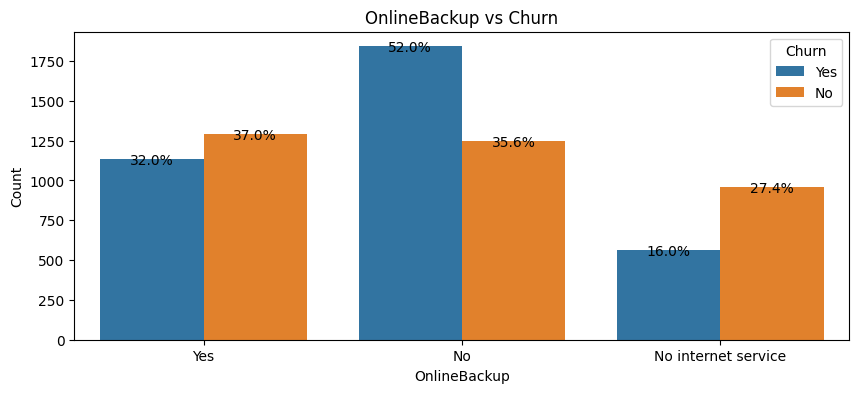

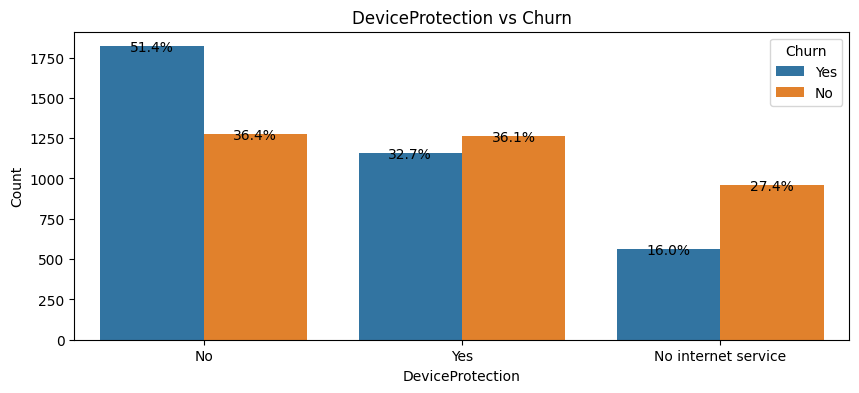

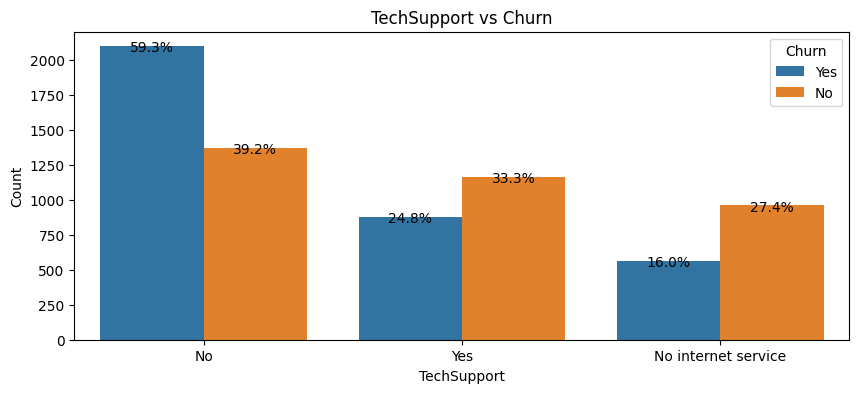

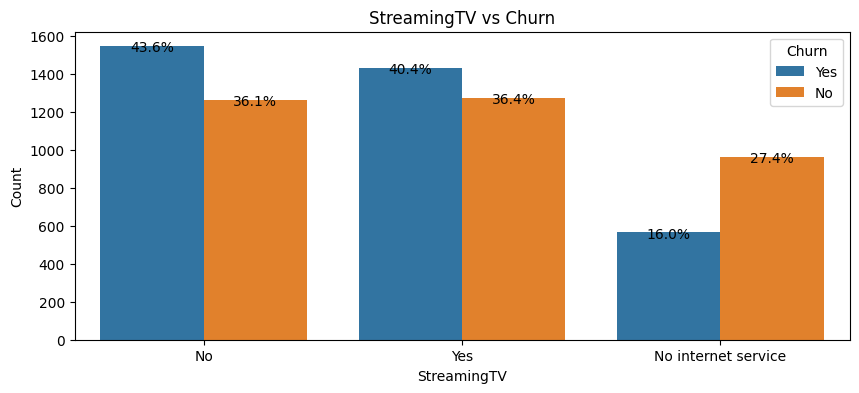

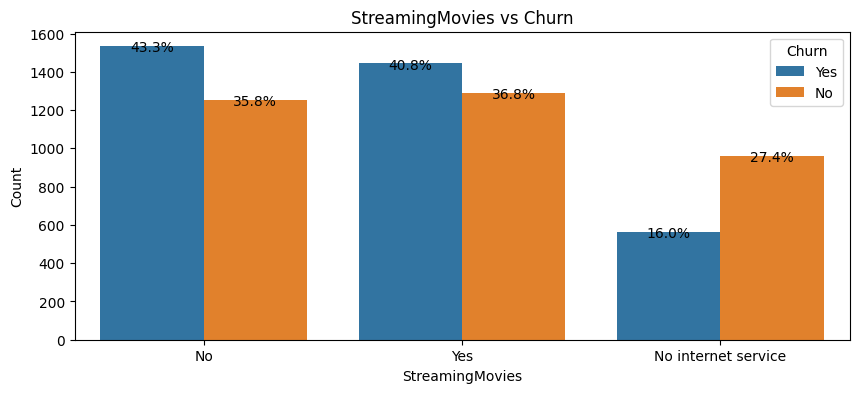

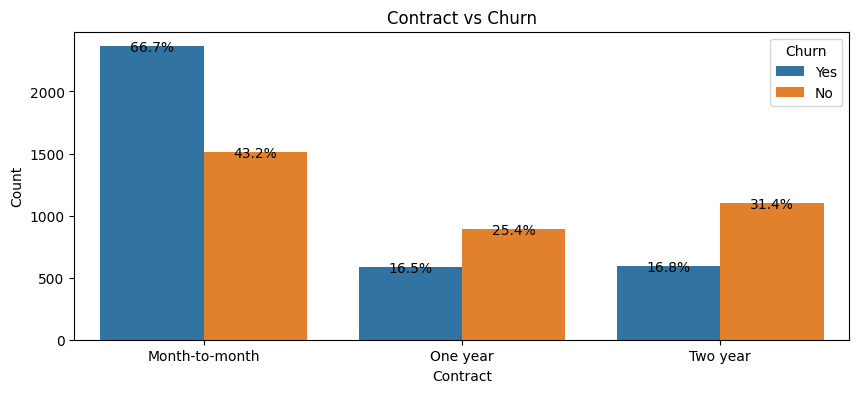

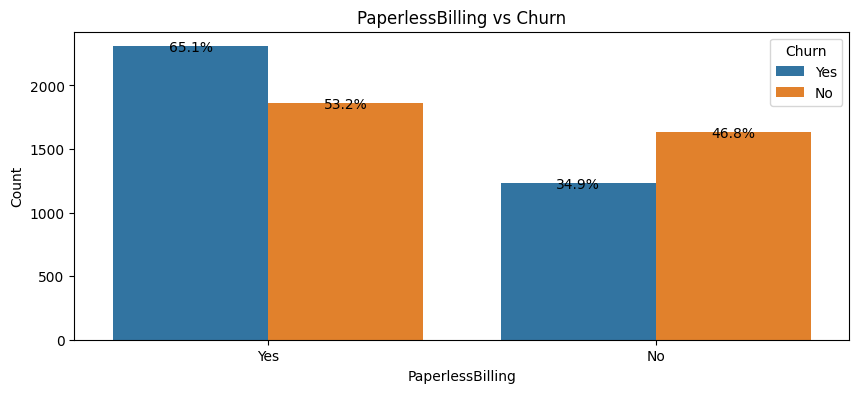

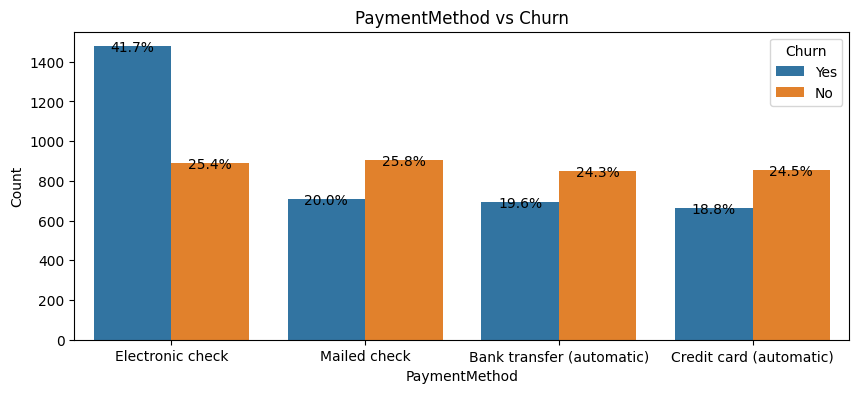

In [26]:
# Bivariate Analysis - Relationship with target variable
# Gender probably will not contribute to separate churn from non-churn indiviuals due to very similar prevalence percentage values 
# The rest of the variables could be included in the training stage

target = 'Churn'  # Replace with your target variable name

for column in df_univ.drop(target, axis=1).columns:
    plt.figure(figsize=(10, 4))
    
    if df_univ[column].dtype == 'object':
        # Categorical variable: countplot with percentage labels
        ax = sns.countplot(x=column, hue=target, data=df_univ)
        
        # Annotate bars with percentages
        for container in ax.containers:
            total_in_group = sum([patch.get_height() for patch in container])
            for bar in container:
                height = bar.get_height()
                percent = f'{100 * height / total_in_group:.1f}%' if total_in_group != 0 else '0%'
                ax.annotate(percent, (bar.get_x() + bar.get_width() / 2, height), ha='center', va='center_baseline')

        plt.ylabel('Count')

    else:
        # Numerical variable: boxplot
        sns.boxplot(x=target, y=column, data=df_univ)
        plt.ylabel(column)
        
    # Add title and labels
    plt.title(f'{column} vs {target}')
    plt.xlabel(column)
    
    plt.show()

#### Sampling, Splitting and Training

* Given the previous univariated and bivariated analysis it is factible to train a supervised model
* Variable Gender can be excluded for the training stage 
* No balancing activities are needed
* 80% of the dataset will be used to train the model and 20% to test it
* XGBoost will be used due to it is a good ensembling model
* Regularization is included using L1 and L2
* Gridsearch will be used to run parameter optimization
    

In [42]:
# Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [44]:
target = 'Churn'  

# Separate features and target variable
X = df.drop([target, 'gender','customerID'], axis=1)
y = df[target]

In [46]:
# Identify categorical columns for one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Define a preprocessor with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'
)


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
xgb_model = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Define the pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Define a grid of hyperparameters to search over
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__max_depth': [3, 5, 7],
    'classifier__alpha': [0, 0.1, 1],
    'classifier__lambda': [1, 1.5, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'classifier__alpha': 0, 'classifier__lambda': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


c:\Users\marti\OneDrive\Desktop\CHURN_MODEL\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'classifier__alpha': 0, 'classifier__lambda': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


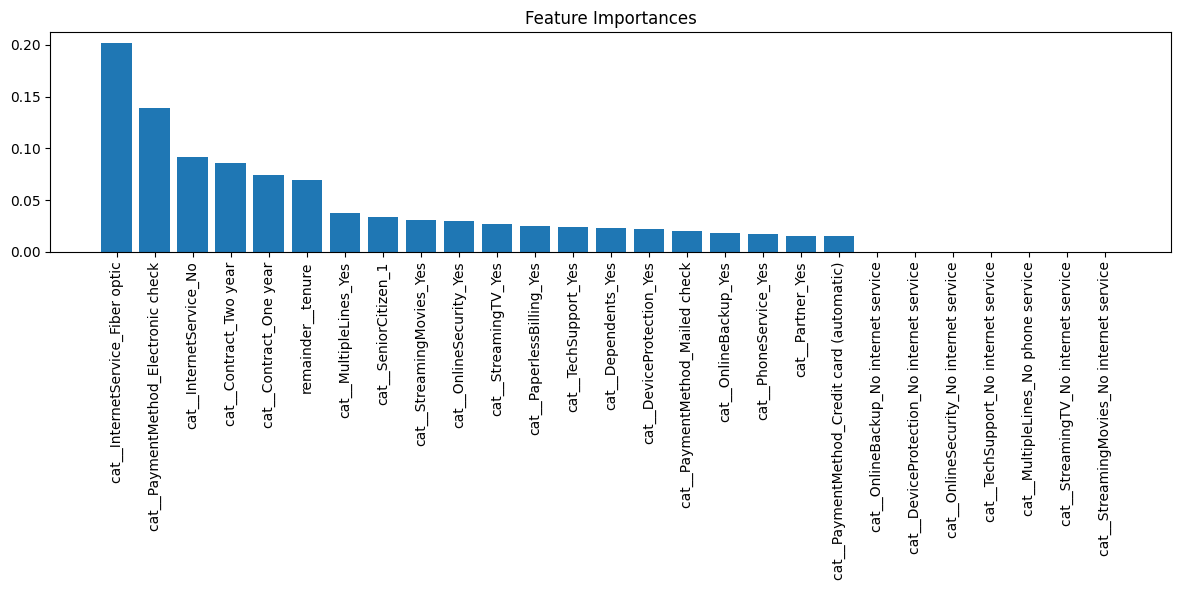

In [62]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Extract the trained XGBoost model from the pipeline
xgb_model = best_model.named_steps['classifier']

# Ensure that the feature names are correctly aligned with the model's input
preprocessor = best_model.named_steps['preprocessor']
encoded_feature_names = preprocessor.get_feature_names_out()

# Combine feature names from preprocessor
numeric_columns = X.select_dtypes(exclude=['object']).columns.tolist()
all_feature_names = np.hstack([encoded_feature_names, numeric_columns])

# Get feature importances
importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [all_feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [53]:
# Getting the presicion of the model

from sklearn.metrics import precision_score

# Make Predictions and Evaluate the Model
y_pred = grid_search.predict(X_test)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Print the Precision
print(f"Model Precision: {precision:.2f}")

Model Precision: 0.69
